## 스타벅스 이벤트 관련 고객 설문 데이터

- 스타벅스에서 고객들에게 특정 프로모션 딜을 보낼 때 더 나은 방법이 있을지 고민하기 위해 만든 시뮬레이션 데이터의 일부입니다.


- 해당 데이터에서 고객들이 이벤트에 어떻게 반응했는지 찾고 고객 프로모션 개선방안에 대한 인사이트를 찾습니다.

### 0. Data Description

1. Profile table

> profile 데이터는 설문에 참여한 스타벅스 회원에 관련된 정보가 담겨 있습니다.


2. transcript

> 이벤트에 참여한 실제 유저들의 응답이 기록되어 있습니다.


3. portfoilo

> 이벤트를 운영했던 내역에 관한 정보가 담겨 있습니다.

### 1. 라이브러리 및 데이터 로드

- 분석에 필요한 데이터와, 라이브러리를 불러옵니다.

In [1]:
# 데이터 분석 필수 라이브러리 4종 세트 불러오기
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns

In [2]:
# Starbucks Customer Data 폴더안에 있는 데이터 3개를 불러오기
transcript = pd.read_csv('Starbucks Customer Data/transcript.csv')
profile = pd.read_csv('Starbucks Customer Data/profile.csv')
portfolio = pd.read_csv('Starbucks Customer Data/portfolio.csv')

In [3]:
# 각 데이터 정리
transcript = transcript.drop(['Unnamed: 0'], axis = 'columns')
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [4]:
profile = profile.drop(['Unnamed: 0'], axis = 'columns')
profile.head()

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [5]:
portfolio = portfolio.drop(['Unnamed: 0'], axis = 'columns')
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"['email', 'mobile', 'social']",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"['web', 'email', 'mobile']",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"['web', 'email', 'mobile']",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"['web', 'email']",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"['web', 'email', 'mobile', 'social']",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"['web', 'email', 'mobile', 'social']",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"['email', 'mobile', 'social']",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"['web', 'email', 'mobile', 'social']",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"['web', 'email', 'mobile']",10,7,discount,2906b810c7d4411798c6938adc9daaa5


### 2. 데이터 전처리

- 결측치가 존재하는 데이터를 찾아서, 결측치를 처리해줍니다.

In [6]:
# 각 데이터에 결측치가 있는지 확인합니다.
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [7]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [8]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [9]:
# 결측치를 포함하는 데이터들은 어떤 데이터들인지 확인합니다.
set(profile['gender'].values)

{'F', 'M', 'O', nan}

In [13]:
# income은 값이 너무 많고, gender와 nan 개수가 똑같길래 혹시 하는마음에 뽑아보니
profile[(profile['gender'].isnull()) & (profile['income'].isnull())]

,gender,age,id,became_member_on,income
0,NaN,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
2,NaN,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
4,NaN,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN
6,NaN,118,8ec6ce2a7e7949b1bf142def7d0e0586,20170925,NaN
7,NaN,118,68617ca6246f4fbc85e91a2a49552598,20171002,NaN
...,...,...,...,...,...
16980,NaN,118,5c686d09ca4d475a8f750f2ba07e0440,20160901,NaN
16982,NaN,118,d9ca82f550ac4ee58b6299cf1e5c824a,20160415,NaN
16989,NaN,118,ca45ee1883624304bac1e4c8a114f045,20180305,NaN
16991,NaN,118,a9a20fa8b5504360beb4e7c8712f8306,20160116,NaN


In [14]:
# 역시 공통된 행에 안 들어 있는듯. 결측치를 처리해줍니다. # 평균과 같은 통계량으로 채워주거나, 버립니다.
profile = profile.dropna()
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 694.9+ KB


In [15]:
profile.describe() #위에 nan 값에 118세가 있길래, 혹시 age의 value 중 0세, 음수, 4자리수 등등 있을까봐 확인

,age,became_member_on,income
count,14825.000000,1.482500e+04,14825.000000
mean,54.393524,2.016689e+07,65404.991568
std,17.383705,1.188565e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,42.000000,2.016052e+07,49000.000000
50%,55.000000,2.017080e+07,64000.000000
75%,66.000000,2.017123e+07,80000.000000
max,101.000000,2.018073e+07,120000.000000


### 3. profile 데이터 분석

- 설문에 참여한 사람 중, 정상적인 데이터로 판단된 데이터에 대한 분석을 수행합니다.


- 각 column마다 원하는 통계량을 찾은 뒤, 해당 통계량을 시각화할 plot을 seaborn에서 가져와 구현합니다.

In [16]:
# profile의 became_member_on 데이터를 시간 정보로 변환해줍니다.
profile.became_member_on = pd.to_datetime(profile.became_member_on.astype(str), format='%Y%m%d')
profile.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14825 entries, 1 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   gender            14825 non-null  object        
 1   age               14825 non-null  int64         
 2   id                14825 non-null  object        
 3   became_member_on  14825 non-null  datetime64[ns]
 4   income            14825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 694.9+ KB


#### 성별에 관한 분석

In [17]:
profile['gender'].value_counts()

M    8484
F    6129
O     212
Name: gender, dtype: int64

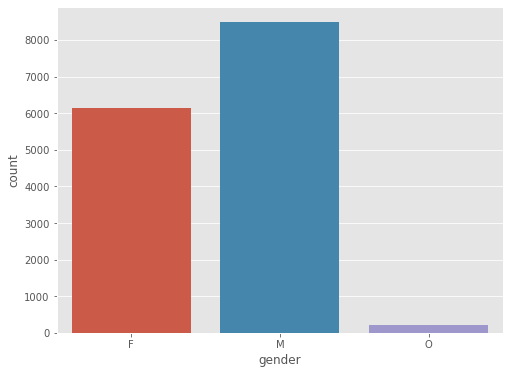

In [18]:
plt.figure(figsize=(8, 6))
sns.countplot(data=profile, x="gender")
plt.show()

- 전체 응답자 중 남성 57%, 여성 41%, 기타 1%로 남성의 비율이 절반 이상을 차지한다.

#### 나이에 대한 분석

In [20]:
# income 부분의 범주를 설정하여 그룹핑이 쉽도록
profile['age_range'] = pd.cut(profile.age, bins = [0,20,30,40,50,60,70,80,90,100,110], labels = ['~20', '21~30', '31~40', '41~50', '51~60', '61~70', '71~80', '81~90', '91~100', '101~110'])
profile['income_range'] = pd.cut(profile.income, bins = [0,40000,50000,60000,70000,80000,90000,100000,110000,120000], labels = ['~40000', '40001~50000', '50001~60000', '60001~70000', '70001~80000', '80001~90000', '90001~100000', '100001~110000', '110001~120000'])
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000


<AxesSubplot:xlabel='age'>

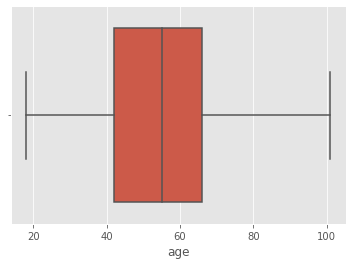

In [21]:
sns.boxplot(data = profile, x = 'age')

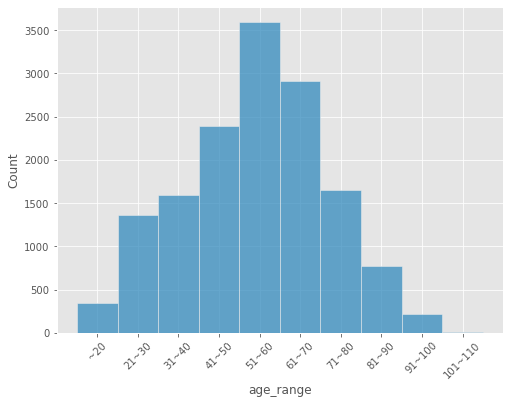

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=profile, x='age_range', bins = 10)
plt.xticks(rotation = 45)
plt.show()

- 전체 응답자 중 51 ~ 60세가 24%로 가장 많았고, 그 뒤로 61 ~ 70세 19%, 41 ~ 50세 16%가 따라왔다.
- 41세 ~ 60세의 비율이 전체의 반 이상을 차지한다.
- 데이터 분석 전, 21 ~ 30세와 31 ~ 40세의 비율이 가장 높을 것이라는 개인적인 생각과 크게 빗나갔다.

#### 수입에 대한 분석

In [23]:
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000


<AxesSubplot:xlabel='income'>

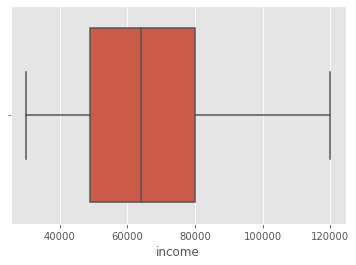

In [24]:
sns.boxplot(data = profile, x = 'income')

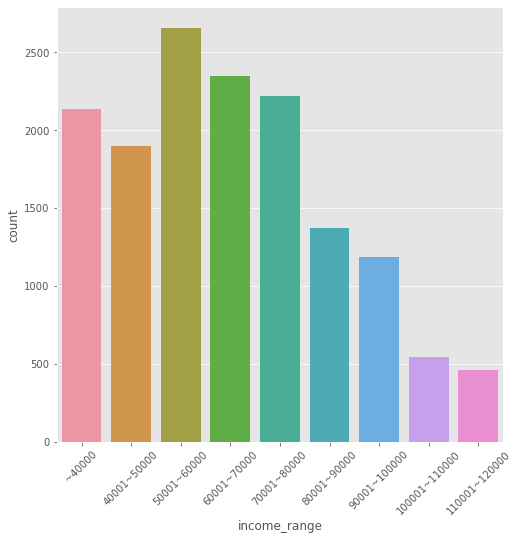

In [25]:
plt.figure(figsize=(8, 8))
plt.xticks(rotation = 45)
sns.countplot(data=profile, x='income_range')
plt.show()

- 전체 응답자 중 50000달러 이상 60000달러 이하를 버는 고객이 가장 많았다.
- 전체 응답자의 평균 소득은 65000달러이다.

#### 회원이 된 날짜에 대한 분석

In [27]:
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000


In [28]:
profile['became_member_on'].value_counts()

2017-08-19    39
2017-10-07    37
2017-12-07    36
2018-01-25    35
2017-10-10    34
              ..
2015-04-05     1
2014-07-13     1
2014-09-18     1
2014-12-12     1
2013-09-22     1
Name: became_member_on, Length: 1707, dtype: int64

In [29]:
#값을 보니 일자로 쪼개지면 너무 세분화되어, 년+월 단위로 정리한다
profile['became_member_on_month'] = profile['became_member_on'].dt.strftime('%Y-%m')
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000,2017-05
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000,2018-04
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000,2017-11


In [30]:
# 얼마나 추려지는지 확인
number_became_member_on_month = profile.groupby('became_member_on_month').nunique()['id']
number_became_member_on_month

became_member_on_month
2013-07      5
2013-08     64
2013-09     55
2013-10     53
2013-11     46
          ... 
2018-03    540
2018-04    508
2018-05    528
2018-06    486
2018-07    450
Name: id, Length: 61, dtype: int64

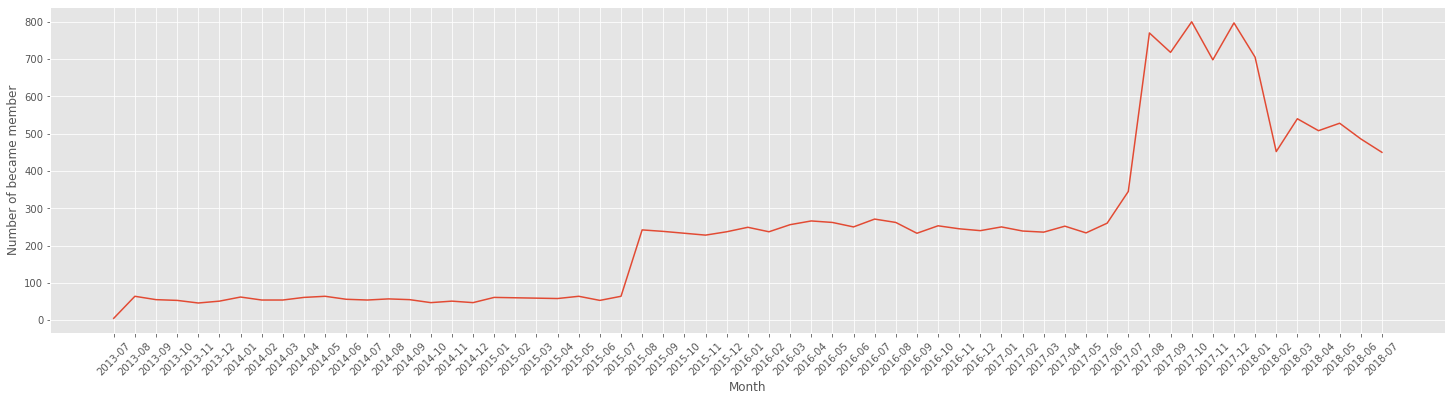

In [31]:
plt.figure(figsize=(25, 6))
plt.xticks(rotation = 45)
g = sns.lineplot(data=number_became_member_on_month)
g.set_xlabel('Month', fontsize = 12)
g.set_ylabel('Number of became member', fontsize = 12)
plt.show()

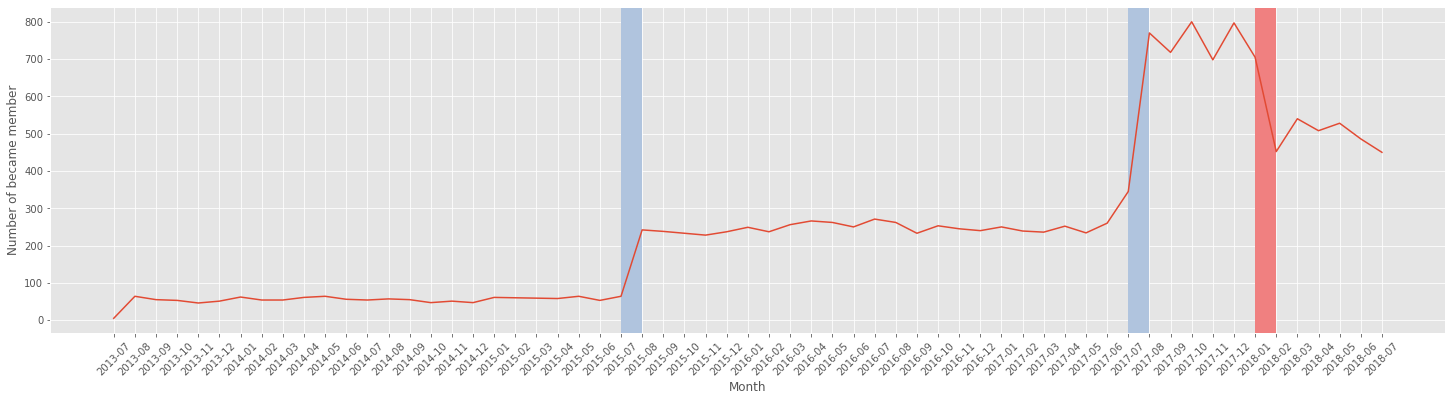

In [32]:
# 급변하는 부분 하이라이트 넣고 싶다
plt.figure(figsize=(25, 6))
plt.xticks(rotation = 45)
g = sns.lineplot(data=number_became_member_on_month)
g.set_xlabel('Month', fontsize = 12)
g.set_ylabel('Number of became member', fontsize = 12)

plt.axvspan('2015-07', '2015-08', facecolor='lightsteelblue')
plt.axvspan('2017-07', '2017-08', facecolor='lightsteelblue')
plt.axvspan('2018-01', '2018-02', facecolor='lightcoral')

plt.show()

- 2015년 8월, 2017년 8월 기점으로 멤버 가입 수 상승
> 해당 기간에 특정 이슈가 있었는지 확인, 유입된 고객 정보를 분석하여 앞으로 해당 타겟으로 멤버 가입을 늘리는 것이 목적이라면 당시에 사용하였던 전략 고려
- 2018년 2월 기점으로 멤버 가입 수 하락
> 시장 전반적인 흐름 및 내부 변동사항 확인하여 대응 필요

In [33]:
#년도별 정리
profile['became_member_on_year'] = profile['became_member_on'].dt.strftime('%Y')
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07,2017
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000,2017-05,2017
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000,2018-04,2018
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02,2018
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000,2017-11,2017


In [34]:
number_became_member_on_year = profile.groupby('became_member_on_year').nunique()['id']
number_became_member_on_year

became_member_on_year
2013     274
2014     662
2015    1597
2016    3024
2017    5599
2018    3669
Name: id, dtype: int64

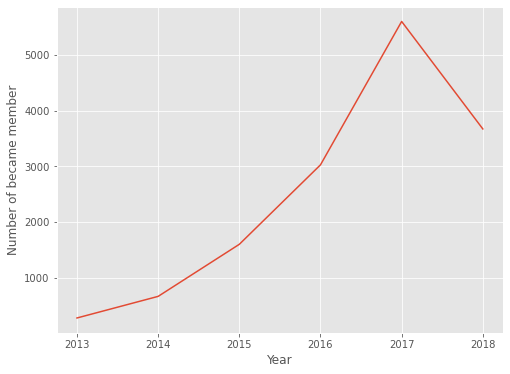

In [35]:
plt.figure(figsize=(8, 6))
g = sns.lineplot(data=number_became_member_on_year)
g.set_xlabel('Year', fontsize = 12)
g.set_ylabel('Number of became member', fontsize = 12)
plt.show()

- 우상승, 13년 최하, 18년 하락
- 단, 13년과 18년의 데이터는 12달 미만이기 때문에 해당 데이터가 추가되어 같은 조건으로 비교된다면 달라질 수 있다.

In [42]:
#요일별 정리
profile['became_member_on_day']=profile['became_member_on'].dt.day_name()

In [43]:
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07,2017,Saturday,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000,2017-05,2017,Tuesday,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000,2018-04,2018,Thursday,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02,2018,Friday,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000,2017-11,2017,Saturday,11


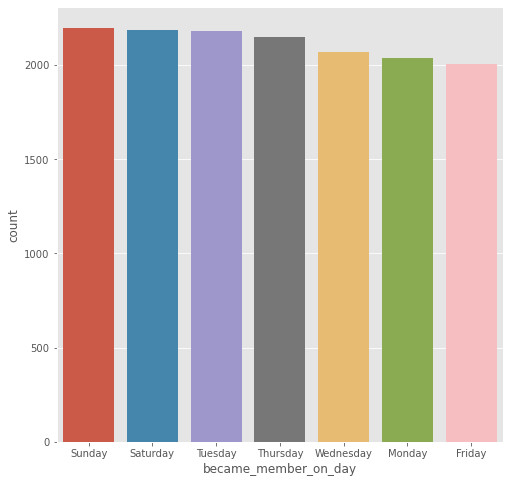

In [44]:
plt.figure(figsize=(8, 8))
sns.countplot(data=profile, x='became_member_on_day', order = profile['became_member_on_day'].value_counts().index)
plt.show()

- 최고: 일요일, 최저: 금요일

In [39]:
#년도 제외, 순수 월별 분석
profile['became_member_on_justmonth'] = profile['became_member_on'].dt.month

In [40]:
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07,2017,Saturday,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000,2017-05,2017,Tuesday,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000,2018-04,2018,Thursday,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02,2018,Friday,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000,2017-11,2017,Saturday,11


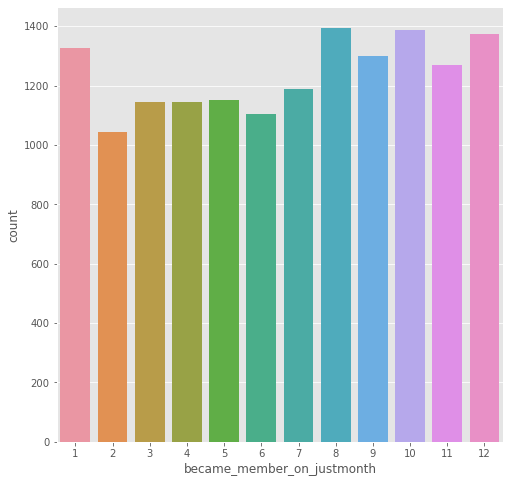

In [41]:
plt.figure(figsize=(8, 8))
sns.countplot(data=profile, x='became_member_on_justmonth')
plt.show()

- 최고:8월, 최저: 2월
- 2월이 일 수가 가장 적다는 점을 고려, 각 월별 일 평균 계산 필요

In [55]:
profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == 1].count()/31

42.806451612903224

In [84]:
n = 1
while n < 13:
    if n == 2:
        avg = profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == n].count()/28
        print ('%d월: %d' % (n,avg))
        n += 1 
        continue
    elif (n % 2 != 0) and (n < 8):
        avg = profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == n].count()/31
        print ('%d월: %d' % (n,avg))
        n += 1 
        continue
    elif (n % 2 == 0) and (n >= 8):
        avg = profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == n].count()/31
        print ('%d월: %d' % (n,avg))
        n += 1 
        continue
    elif (n % 2 == 0) and (n < 8):
        avg = profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == n].count()/30
        print ('%d월: %d' % (n,avg))
        n += 1 
        continue
    elif (n % 2 != 0) and (n > 8):
        avg = profile['became_member_on_justmonth'].loc[profile['became_member_on_justmonth'] == n].count()/31
        print ('%d월: %d' % (n,avg))
        n += 1 
        continue

1월: 42
2월: 37
3월: 36
4월: 38
5월: 37
6월: 36
7월: 38
8월: 45
9월: 41
10월: 44
11월: 40
12월: 44


- 월 총 멤버 가입 수를 일별 평균으로 나누니 최고 8월, 최저는 각 3월과 6월로 나타났습니다.

#### profile 데이터에 대한 상관관계 분석

In [85]:
profile.head()

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07,2017,Saturday,7
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,2017-05-09,100000.0,71~80,90001~100000,2017-05,2017,Tuesday,5
5,M,68,e2127556f4f64592b11af22de27a7932,2018-04-26,70000.0,61~70,60001~70000,2018-04,2018,Thursday,4
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02,2018,Friday,2
12,M,58,2eeac8d8feae4a8cad5a6af0499a211d,2017-11-11,51000.0,51~60,50001~60000,2017-11,2017,Saturday,11


가입자 수가 크게 증가한 구간인 2015년 7월-8월, 2017년 7월-8월, 감소한 구간인 2018년 1월-2월을 비교한다.

In [86]:
#2015년 7월
jul_2015 = profile[profile['became_member_on_month'] == '2015-07']
jul_2015

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
259,F,89,4c0b938c4e994b168f0062d7dbb79796,2015-07-22,59000.0,81~90,50001~60000,2015-07,2015,Wednesday,7
596,F,80,c35b03c286fa44bea8a1739558a87d3f,2015-07-28,54000.0,71~80,50001~60000,2015-07,2015,Tuesday,7
708,M,48,42b57a678bda41d88dd6adfa2e5f8d5d,2015-07-19,65000.0,41~50,60001~70000,2015-07,2015,Sunday,7
1118,M,56,a4e7d9d612f747b997fb9c174a1c5b45,2015-07-20,49000.0,51~60,40001~50000,2015-07,2015,Monday,7
1323,F,19,9c25e0a9b6974c86a3fbd04bf32f8dd9,2015-07-20,67000.0,~20,60001~70000,2015-07,2015,Monday,7
...,...,...,...,...,...,...,...,...,...,...,...
16114,M,65,60f9f0df41b544a5b243952d8a89541c,2015-07-17,31000.0,61~70,~40000,2015-07,2015,Friday,7
16193,M,72,760786cb5e2d4df1affeb9dc6a3b8e86,2015-07-22,75000.0,71~80,70001~80000,2015-07,2015,Wednesday,7
16564,F,47,c625f19855bb4d0084861d2b6433c5da,2015-07-19,99000.0,41~50,90001~100000,2015-07,2015,Sunday,7
16584,M,66,1cb38fd0d87f416ebb598072f22a7c66,2015-07-07,32000.0,61~70,~40000,2015-07,2015,Tuesday,7


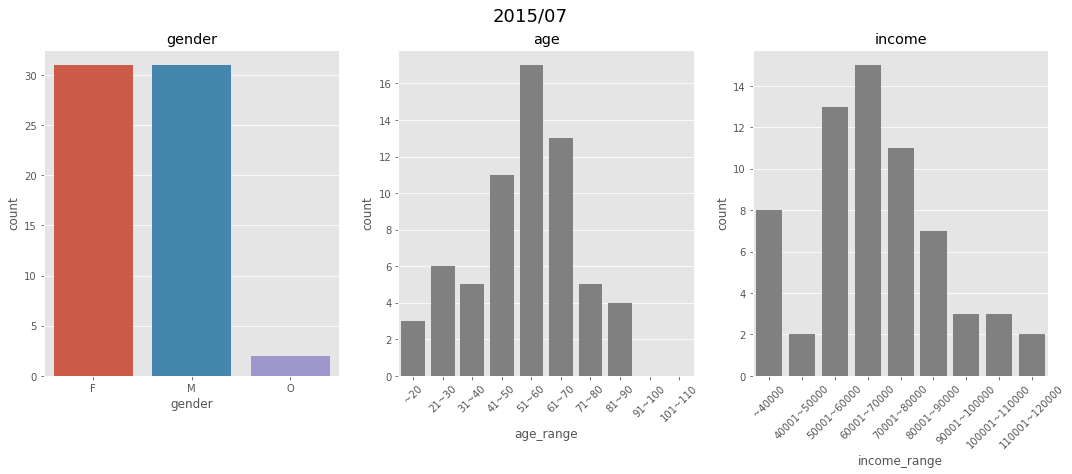

In [136]:
fig = plt.figure(figsize=(18,6))
fig.suptitle('2015/07', fontsize = 18)


plt.subplot(1, 3, 1) # gender
g01 = sns.countplot(data=jul_2015, x='gender')
plt.title('gender')
#plt.xticks(rotation = 45)

plt.subplot(1, 3, 2) # age
g02 = sns.countplot(data=jul_2015, x='age_range', color = 'gray')
plt.title('age')
plt.xticks(rotation = 45)


plt.subplot(1, 3, 3) # income
g03 = sns.countplot(data=jul_2015, x='income_range', color = 'gray')
plt.title('income')
plt.xticks(rotation = 45)

plt.show()

In [122]:
def subplot(data_frame, date):
    fig = plt.figure(figsize=(18,6))
    fig.suptitle(date, fontsize = 18)

    plt.subplot(1, 3, 1) # gender
    g01 = sns.countplot(data=data_frame, x='gender', order = gender_list)
    plt.title('gender')

    plt.subplot(1, 3, 2) # age
    g02 = sns.countplot(data=data_frame, x='age_range', color = 'gray')
    plt.title('age')
    plt.xticks(rotation = 45)

    plt.subplot(1, 3, 3) # income
    g03 = sns.countplot(data=data_frame, x='income_range', color = 'gray')
    plt.title('income')
    plt.xticks(rotation = 45)

    plt.show()

In [90]:
# 2015년 8월
aug_2015 = profile[profile['became_member_on_month'] == '2015-08']
aug_2015

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
247,M,51,e277228d77a64ab896d6dd6d88f970d3,2015-08-15,54000.0,51~60,50001~60000,2015-08,2015,Saturday,8
283,F,100,24c1287eb7a84cfd80472a82e05b1d57,2015-08-28,63000.0,91~100,60001~70000,2015-08,2015,Friday,8
293,M,20,4e6eb10de9744995be7496f5b1cc7bcf,2015-08-12,32000.0,~20,~40000,2015-08,2015,Wednesday,8
297,M,71,a4ac99af1b7f4344b734ac07592ab717,2015-08-26,95000.0,71~80,90001~100000,2015-08,2015,Wednesday,8
646,F,56,e58ffa65111b459c9d6d98b0e137d4b7,2015-08-26,80000.0,51~60,70001~80000,2015-08,2015,Wednesday,8
...,...,...,...,...,...,...,...,...,...,...,...
16509,M,19,b73d1b7b243e40a6ac9c3125a8015300,2015-08-04,54000.0,~20,50001~60000,2015-08,2015,Tuesday,8
16522,F,47,2e3cd445c56249779436d732f8b04e12,2015-08-13,33000.0,41~50,~40000,2015-08,2015,Thursday,8
16588,F,57,cff228bfca314af0b81f421c7e33cce5,2015-08-15,78000.0,51~60,70001~80000,2015-08,2015,Saturday,8
16710,F,68,6b3371ef96d4438ea6f987ebd0f4c4f4,2015-08-24,83000.0,61~70,80001~90000,2015-08,2015,Monday,8


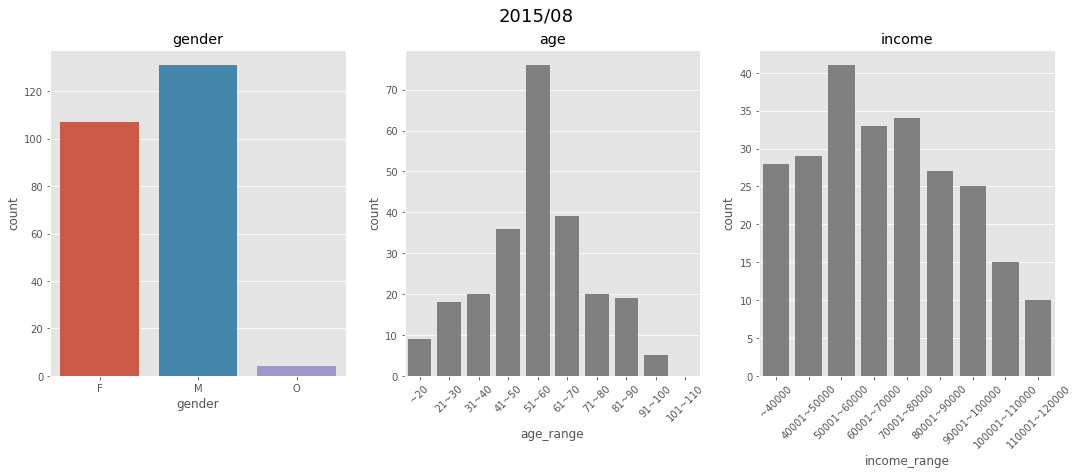

In [123]:
subplot(aug_2015, '2015/08')

# 여기부터 수정 시작하면 됨

In [94]:
#2017년 7월
jul_2017 = profile[profile['became_member_on_month'] == '2017-07']
jul_2017

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
1,F,55,0610b486422d4921ae7d2bf64640c50b,2017-07-15,112000.0,51~60,110001~120000,2017-07,2017,Saturday,7
114,F,57,93e67942586e43fb87d5ffb1ead8db41,2017-07-04,114000.0,51~60,110001~120000,2017-07,2017,Tuesday,7
204,M,38,1eed89c11cc749a4bb93d8cef032821d,2017-07-09,74000.0,31~40,70001~80000,2017-07,2017,Sunday,7
234,M,63,044f41cfd98940119477d73c81f973a3,2017-07-29,36000.0,61~70,~40000,2017-07,2017,Saturday,7
308,M,43,9ef935700f384fefa0e1a34f92555abd,2017-07-04,42000.0,41~50,40001~50000,2017-07,2017,Tuesday,7
...,...,...,...,...,...,...,...,...,...,...,...
16919,M,62,30e6fc01376140c6b08cb328f049a42d,2017-07-31,52000.0,61~70,50001~60000,2017-07,2017,Monday,7
16954,F,65,22ce932a14c34f2fbd3d36d4f3a598d5,2017-07-05,35000.0,61~70,~40000,2017-07,2017,Wednesday,7
16968,M,74,2c6f50c1c07a444896e2a4e31d724f92,2017-07-25,87000.0,71~80,80001~90000,2017-07,2017,Tuesday,7
16986,F,59,bf3069b178fe40d789dd027901bc406b,2017-07-31,63000.0,51~60,60001~70000,2017-07,2017,Monday,7


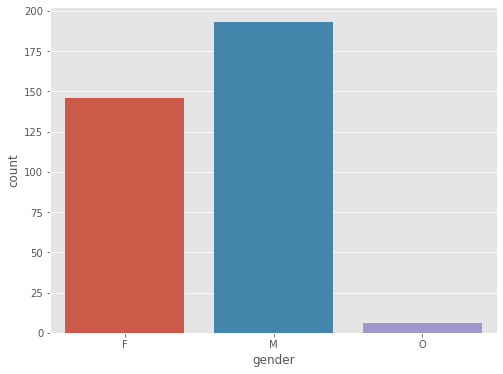

In [95]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jul_2017, x='gender')
plt.show()

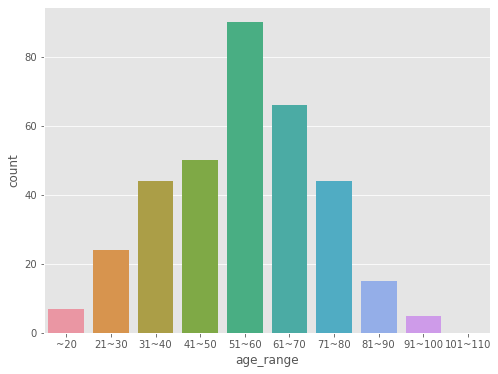

In [96]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jul_2017, x='age_range')
plt.show()

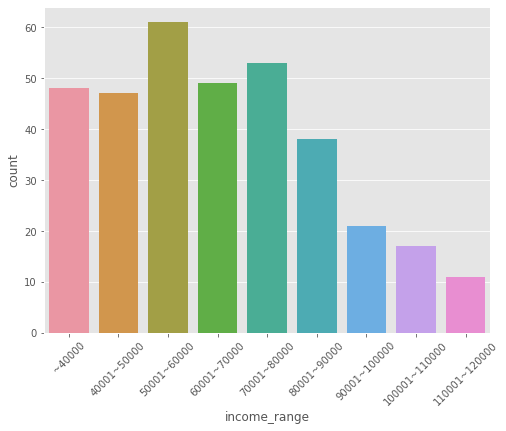

In [97]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jul_2017, x='income_range')
plt.xticks(rotation = 45)
plt.show()

In [98]:
#2017년 8월
aug_2017 = profile[profile['became_member_on_month'] == '2017-08']
aug_2017

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
38,F,26,9f30b375d7bd4c62a884ffe7034e09ee,2017-08-12,63000.0,21~30,60001~70000,2017-08,2017,Saturday,8
65,M,68,d3f146b615514c6380b168bb3df5f05b,2017-08-23,87000.0,61~70,80001~90000,2017-08,2017,Wednesday,8
79,M,59,0b73997a269247088b2a63355f53ee58,2017-08-20,89000.0,51~60,80001~90000,2017-08,2017,Sunday,8
101,M,45,b19c8e7ac2ff40ae92b4fcf3247f8912,2017-08-15,54000.0,41~50,50001~60000,2017-08,2017,Tuesday,8
120,F,51,1a353048b0884fc5a0afa27677ef1e80,2017-08-13,56000.0,51~60,50001~60000,2017-08,2017,Sunday,8
...,...,...,...,...,...,...,...,...,...,...,...
16785,F,57,e7f04bcbc35343cdb16c74de185b1970,2017-08-11,83000.0,51~60,80001~90000,2017-08,2017,Friday,8
16797,F,50,0f5cb923d0a74415aca9ce5dd0c60e46,2017-08-04,76000.0,41~50,70001~80000,2017-08,2017,Friday,8
16901,F,73,435afc43755d4bd5ab56ec38dcc152ff,2017-08-08,98000.0,71~80,90001~100000,2017-08,2017,Tuesday,8
16902,F,79,6daa587dc49545a8b0d9d4e61d66cc8c,2017-08-13,70000.0,71~80,60001~70000,2017-08,2017,Sunday,8


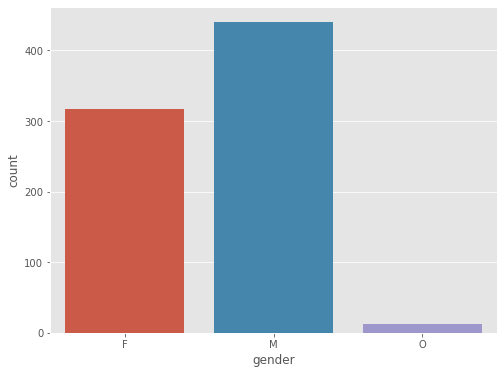

In [99]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aug_2017, x='gender')
plt.show()

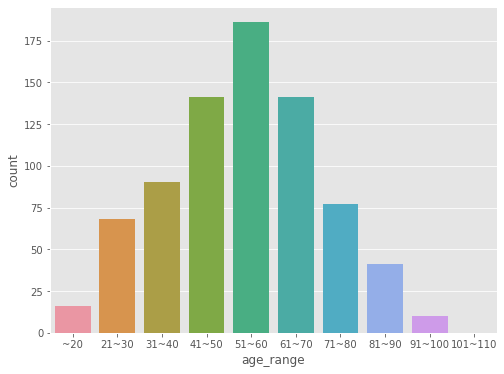

In [100]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aug_2017, x='age_range')
plt.show()

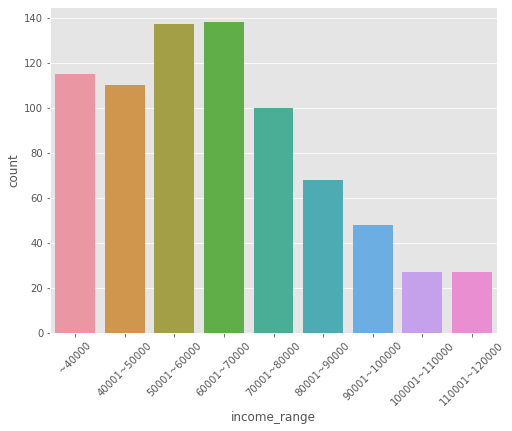

In [101]:
plt.figure(figsize=(8, 6))
sns.countplot(data=aug_2017, x='income_range')
plt.xticks(rotation = 45)
plt.show()

In [589]:
#2018년 1월
jan_2018 = profile[profile['became_member_on_month'] == '2018-01']
jan_2018

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
76,F,58,99e9a1916821461ebd5d5048dc2dff7d,2018-01-25,85000.0,51~60,80001~90000,2018-01,2018,Thursday,1
82,M,27,6e04a90a0e074496b5f229eb1f553433,2018-01-10,35000.0,21~30,~40000,2018-01,2018,Wednesday,1
126,M,83,4c29d22467af4d7faa137c4eedd65340,2018-01-27,46000.0,81~90,40001~50000,2018-01,2018,Saturday,1
131,F,89,3dae0eadb47149b0b9b548d14548524b,2018-01-14,65000.0,81~90,60001~70000,2018-01,2018,Sunday,1
137,M,52,acbc358a8bf44ba88d0de1f2bec5b2ab,2018-01-30,30000.0,51~60,~40000,2018-01,2018,Tuesday,1
...,...,...,...,...,...,...,...,...,...,...,...
16920,O,60,7a3f1c41fc684f8b9631fd20e498c97a,2018-01-25,47000.0,51~60,40001~50000,2018-01,2018,Thursday,1
16948,F,71,3d2ae0a586794fbe881dace3aa2258c6,2018-01-10,64000.0,71~80,60001~70000,2018-01,2018,Wednesday,1
16950,F,26,c15a1ba4aca940b6ba02f74c31985d3d,2018-01-26,65000.0,21~30,60001~70000,2018-01,2018,Friday,1
16959,M,66,b3a1272bc9904337b331bf348c3e8c17,2018-01-01,47000.0,61~70,40001~50000,2018-01,2018,Monday,1


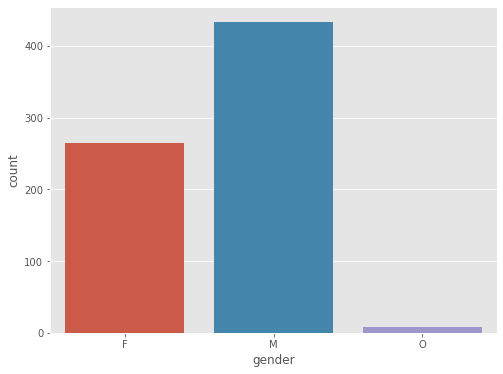

In [590]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jan_2018, x='gender')
plt.show()

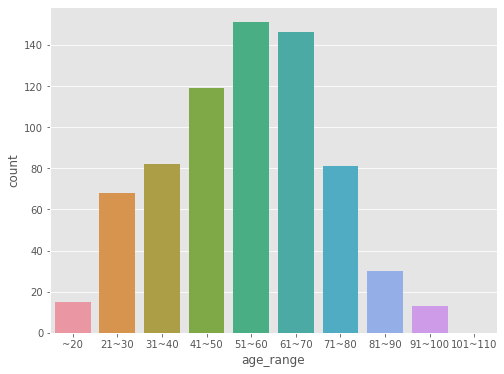

In [591]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jan_2018, x='age_range')
plt.show()

In [592]:
jan_2018['age_range'].value_counts(normalize=True)

51~60      0.214184
61~70      0.207092
41~50      0.168794
31~40      0.116312
71~80      0.114894
21~30      0.096454
81~90      0.042553
~20        0.021277
91~100     0.018440
101~110    0.000000
Name: age_range, dtype: float64

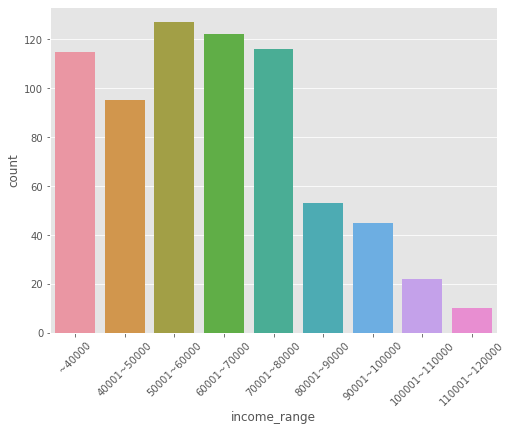

In [593]:
plt.figure(figsize=(8, 6))
sns.countplot(data=jan_2018, x='income_range')
plt.xticks(rotation = 45)
plt.show()

In [594]:
jan_2018['income_range'].value_counts(normalize=True)

50001~60000      0.180142
60001~70000      0.173050
70001~80000      0.164539
~40000           0.163121
40001~50000      0.134752
80001~90000      0.075177
90001~100000     0.063830
100001~110000    0.031206
110001~120000    0.014184
Name: income_range, dtype: float64

In [595]:
#2018년 2월
feb_2018 = profile[profile['became_member_on_month'] == '2018-02']
feb_2018

,gender,age,id,became_member_on,income,age_range,income_range,became_member_on_month,became_member_on_year,became_member_on_day,became_member_on_justmonth
8,M,65,389bc3fa690240e798340f5a15918d5c,2018-02-09,53000.0,61~70,50001~60000,2018-02,2018,Friday,2
70,M,57,b62e66ca4dcf4df39fd522e750a88d81,2018-02-07,98000.0,51~60,90001~100000,2018-02,2018,Wednesday,2
83,M,40,262ad0fb526a4d53b572007da60cce24,2018-02-27,53000.0,31~40,50001~60000,2018-02,2018,Tuesday,2
106,F,66,92e07c49ee7448fca6e48df0c96e3eec,2018-02-16,58000.0,61~70,50001~60000,2018-02,2018,Friday,2
153,M,68,c863af14b3654499b1caea5e640136d2,2018-02-07,58000.0,61~70,50001~60000,2018-02,2018,Wednesday,2
...,...,...,...,...,...,...,...,...,...,...,...
16859,M,61,11ff03cea2e6497fa70fbd9986d5d1dd,2018-02-02,34000.0,61~70,~40000,2018-02,2018,Friday,2
16884,M,39,f367a50b86d049799bbb0eb645ee834c,2018-02-17,33000.0,31~40,~40000,2018-02,2018,Saturday,2
16897,M,33,8b32527512f641f9a5447ba5a811f3af,2018-02-13,57000.0,31~40,50001~60000,2018-02,2018,Tuesday,2
16937,M,51,d5d487cfdc5b456b84b7881ad5d3640b,2018-02-08,79000.0,51~60,70001~80000,2018-02,2018,Thursday,2


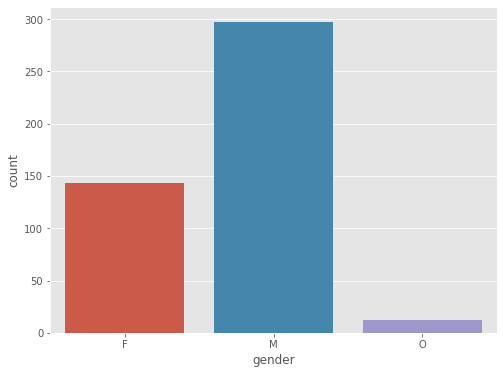

In [738]:
plt.figure(figsize=(8, 6))
sns.countplot(data=feb_2018, x='gender', order = gender_list)
plt.show()

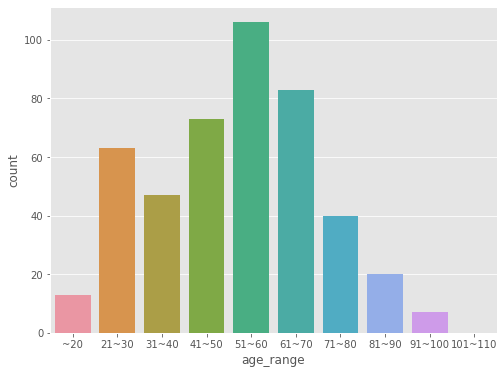

In [597]:
plt.figure(figsize=(8, 6))
sns.countplot(data=feb_2018, x='age_range')
plt.show()

In [598]:
feb_2018['age_range'].value_counts(normalize=True)

51~60      0.234513
61~70      0.183628
41~50      0.161504
21~30      0.139381
31~40      0.103982
71~80      0.088496
81~90      0.044248
~20        0.028761
91~100     0.015487
101~110    0.000000
Name: age_range, dtype: float64

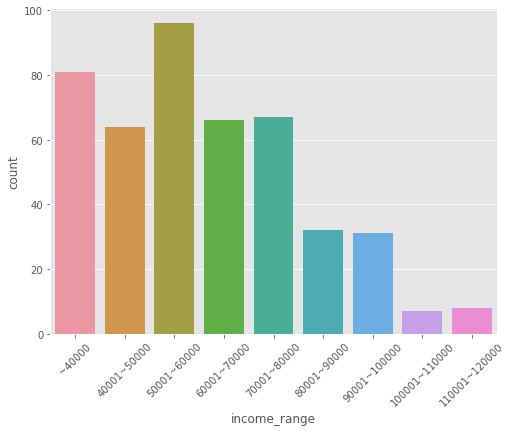

In [599]:
plt.figure(figsize=(8, 6))
sns.countplot(data=feb_2018, x='income_range')
plt.xticks(rotation = 45)
plt.show()

In [600]:
feb_2018['income_range'].value_counts(normalize=True)

50001~60000      0.212389
~40000           0.179204
70001~80000      0.148230
60001~70000      0.146018
40001~50000      0.141593
80001~90000      0.070796
90001~100000     0.068584
110001~120000    0.017699
100001~110000    0.015487
Name: income_range, dtype: float64

### 4. transcript에 대한 분석

#### event에 대한 분석

In [601]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [602]:
#event는 어떤 종류가 얼마나 있는지 확인
transcript['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

In [603]:
transcript['event'].value_counts(normalize=True)

transaction        0.453304
offer received     0.248837
offer viewed       0.188315
offer completed    0.109544
Name: event, dtype: float64

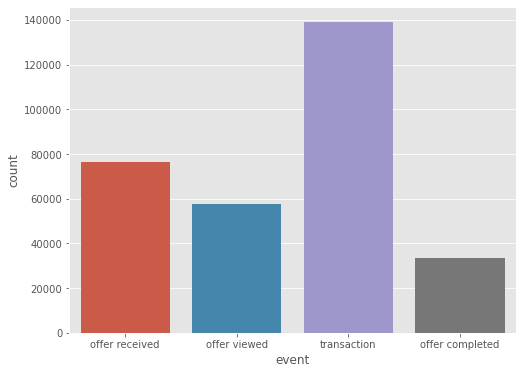

In [604]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x = 'event')
plt.show()

- 전체 거래 중 transaction이 45%를 차지하는 반면 완료 비율은 11%에 그친다.

In [605]:
transcript_person = pd.DataFrame(transcript.groupby('person')['event'].value_counts())

In [606]:
transcript_person.rename(columns = {'event': 'count'}, inplace = True)

In [607]:
transcript_person

count
person                           event                 
0009655768c64bdeb2e877511632db8f transaction          8
                                 offer received       5
                                 offer viewed         4
                                 offer completed      3
00116118485d4dfda04fdbaba9a87b5c transaction          3
...                                                 ...
fffad4f4828548d1b5583907f2e9906b offer completed      3
ffff82501cea40309d5fdd7edcca4a07 transaction         15
                                 offer completed      6
                                 offer received       6
                                 offer viewed         6

[63180 rows x 1 columns]

In [608]:
transcript_person.reset_index(level = 1, inplace = True)

In [609]:
transcript_person.reset_index(level = 0, inplace = True)

In [610]:
pivot_transcript_person = transcript_person.pivot(index = 'person', columns = 'event', values = 'count')
pivot_transcript_person

event,offer completed,offer received,offer viewed,transaction
person,,,,
0009655768c64bdeb2e877511632db8f,3.0,5.0,4.0,8.0
00116118485d4dfda04fdbaba9a87b5c,NaN,2.0,2.0,3.0
0011e0d4e6b944f998e987f904e8c1e5,3.0,5.0,5.0,5.0
0020c2b971eb4e9188eac86d93036a77,3.0,5.0,3.0,8.0
0020ccbbb6d84e358d3414a3ff76cffd,3.0,4.0,4.0,12.0
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3.0,6.0,3.0,11.0
fff7576017104bcc8677a8d63322b5e1,3.0,5.0,4.0,6.0
fff8957ea8b240a6b5e634b6ee8eafcf,NaN,3.0,2.0,5.0


In [611]:
pivot_transcript_person.fillna(0)

event,offer completed,offer received,offer viewed,transaction
person,,,,
0009655768c64bdeb2e877511632db8f,3.0,5.0,4.0,8.0
00116118485d4dfda04fdbaba9a87b5c,0.0,2.0,2.0,3.0
0011e0d4e6b944f998e987f904e8c1e5,3.0,5.0,5.0,5.0
0020c2b971eb4e9188eac86d93036a77,3.0,5.0,3.0,8.0
0020ccbbb6d84e358d3414a3ff76cffd,3.0,4.0,4.0,12.0
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,3.0,6.0,3.0,11.0
fff7576017104bcc8677a8d63322b5e1,3.0,5.0,4.0,6.0
fff8957ea8b240a6b5e634b6ee8eafcf,0.0,3.0,2.0,5.0


In [759]:
pivot_transcript_person = pivot_transcript_person[['offer received', 'offer viewed', 'transaction', 'offer completed']]
pivot_transcript_person

event,offer received,offer viewed,transaction,offer completed
person,,,,
0009655768c64bdeb2e877511632db8f,5.0,4.0,8.0,3.0
00116118485d4dfda04fdbaba9a87b5c,2.0,2.0,3.0,NaN
0011e0d4e6b944f998e987f904e8c1e5,5.0,5.0,5.0,3.0
0020c2b971eb4e9188eac86d93036a77,5.0,3.0,8.0,3.0
0020ccbbb6d84e358d3414a3ff76cffd,4.0,4.0,12.0,3.0
...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,6.0,3.0,11.0,3.0
fff7576017104bcc8677a8d63322b5e1,5.0,4.0,6.0,3.0
fff8957ea8b240a6b5e634b6ee8eafcf,3.0,2.0,5.0,NaN


In [613]:
pivot_transcript_person.describe()

event,offer received,offer viewed,transaction,offer completed
count,16994.000000,16834.000000,16578.000000,12774.000000
mean,4.488467,3.429072,8.381771,2.628699
std,1.073047,1.259239,5.009822,1.308750
min,1.000000,1.000000,1.000000,1.000000
25%,4.000000,3.000000,5.000000,2.000000
50%,5.000000,3.000000,7.000000,3.000000
75%,5.000000,4.000000,11.000000,4.000000
max,6.000000,6.000000,36.000000,6.000000


<AxesSubplot:xlabel='event'>

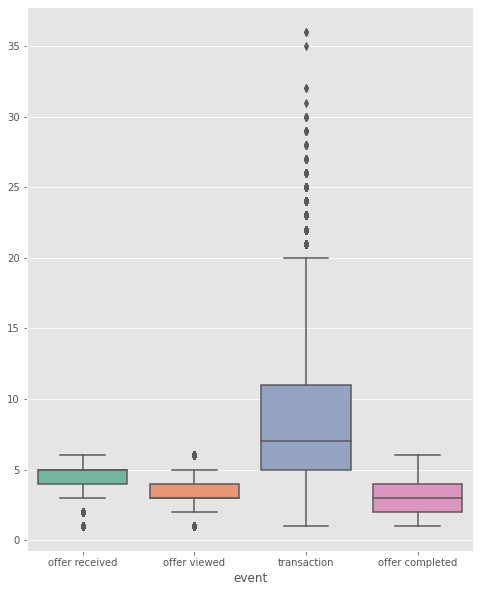

In [739]:
plt.figure(figsize = (8,10))
sns.boxplot(data = pivot_transcript_person, palette = 'Set2')

평균적으로 고객 1명 당 offer received는 4.5회, offer viewed는 3.4회, transaction은 8.4회, offer completed는 2.6회 발생했다.<br>
transaction은 offer received의 약 1.9배로, 다른 이벤트들보다 훨씬 많이 발생했다.

#### time에 대한 분석

In [615]:
transcript.head(20)

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
5,389bc3fa690240e798340f5a15918d5c,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
6,c4863c7985cf408faee930f111475da3,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},0
7,2eeac8d8feae4a8cad5a6af0499a211d,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},0
8,aa4862eba776480b8bb9c68455b8c2e1,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
9,31dda685af34476cad5bc968bdb01c53,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0


In [616]:
#time의 기준 파악하기
transcript['time'].unique()

array([  0,   6,  12,  18,  24,  30,  36,  42,  48,  54,  60,  66,  72,
        78,  84,  90,  96, 102, 108, 114, 120, 126, 132, 138, 144, 150,
       156, 162, 168, 174, 180, 186, 192, 198, 204, 210, 216, 222, 228,
       234, 240, 246, 252, 258, 264, 270, 276, 282, 288, 294, 300, 306,
       312, 318, 324, 330, 336, 342, 348, 354, 360, 366, 372, 378, 384,
       390, 396, 402, 408, 414, 420, 426, 432, 438, 444, 450, 456, 462,
       468, 474, 480, 486, 492, 498, 504, 510, 516, 522, 528, 534, 540,
       546, 552, 558, 564, 570, 576, 582, 588, 594, 600, 606, 612, 618,
       624, 630, 636, 642, 648, 654, 660, 666, 672, 678, 684, 690, 696,
       702, 708, 714])

시간 기록이 6의 배수로 진행된다. 일 기준이었다면 7의 배수였을텐데, 그렇지 않아서 일보다 작은 단위인 시간으로 간주하고 분석을 진행했다.

In [617]:
transcript['time'].value_counts().head(10)

408    17030
576    17015
504    16822
336    16302
168    16150
0      15561
414     3583
510     3514
582     3484
588     3222
Name: time, dtype: int64

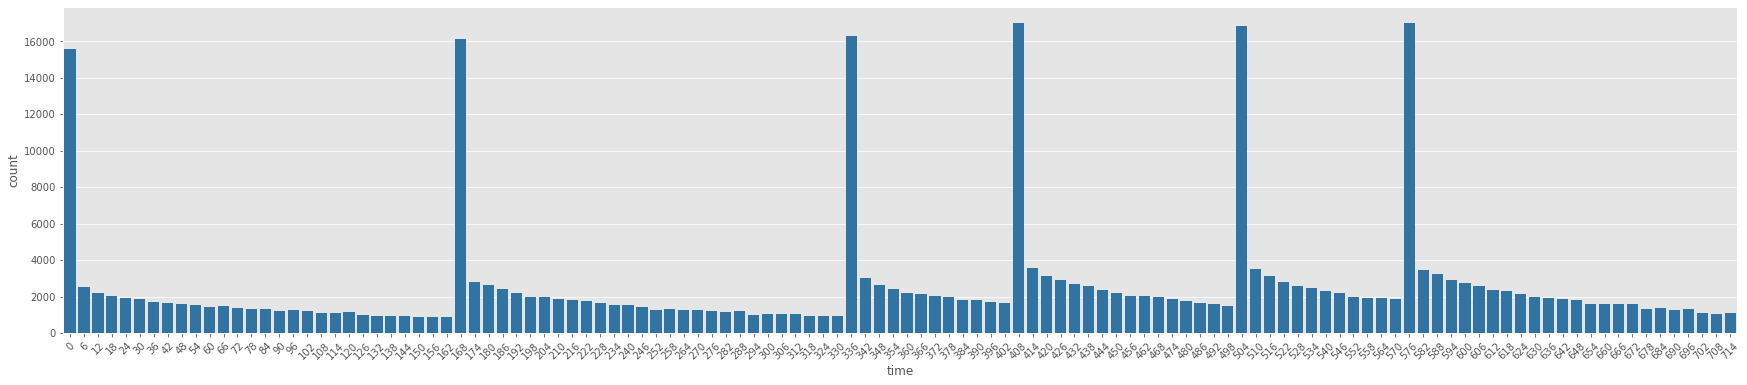

In [618]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation = 45)
sns.countplot(data=transcript, x = 'time', color = 'tab:blue')
plt.show()

일정 시간대에 눈에 띄게 데이터가 많이 집계됨. 이유를 알기 위해 event 세부 분석

In [621]:
df_event_offer_received = transcript[transcript['event'] == 'offer received']
df_event_offer_received

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
257882,d087c473b4d247ccb0abfef59ba12b0e,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},576
257883,cb23b66c56f64b109d673d5e56574529,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},576
257884,6d5f3a774f3d4714ab0c092238f3a1d7,offer received,{'offer id': '2298d6c36e964ae4a3e7e9706d1fb8c2'},576
257885,9dc1421481194dcd9400aec7c9ae6366,offer received,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},576


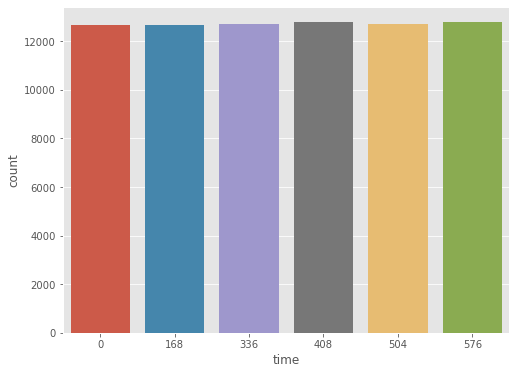

In [622]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df_event_offer_received, x = 'time')
plt.show()

특정 시간대에 유난히 그래프가 치솟았던 이유를 알게 되었다.

In [623]:
df_event_offer_viewed = transcript[transcript['event'] == 'offer viewed']
df_event_offer_viewed

,person,event,value,time
12650,389bc3fa690240e798340f5a15918d5c,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},0
12651,d1ede868e29245ea91818a903fec04c6,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
12652,102e9454054946fda62242d2e176fdce,offer viewed,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
12653,02c083884c7d45b39cc68e1314fec56c,offer viewed,{'offer id': 'ae264e3637204a6fb9bb56bc8210ddfd'},0
12655,be8a5d1981a2458d90b255ddc7e0d174,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},0
...,...,...,...,...
306441,d56386cf344c4829bbf420d1895dca37,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},714
306450,9b51e8797290403b90d09d864dec4b94,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},714
306483,84fb57a7fe8045a8bf6236738ee73a0f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},714
306490,abc4359eb34e4e2ca2349da2ddf771b6,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},714


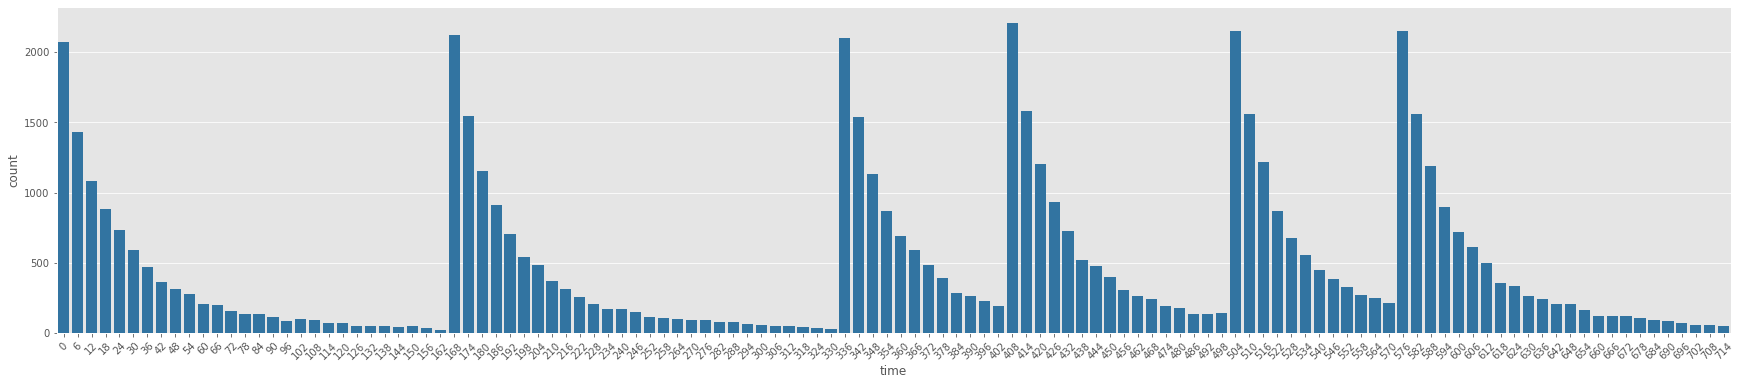

In [624]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation = 45)
sns.countplot(data=df_event_offer_viewed, x = 'time', color = 'tab:blue')
plt.show()

In [619]:
df_event_transaction = transcript[transcript['event'] == 'transaction']
df_event_transaction

,person,event,value,time
12654,02c083884c7d45b39cc68e1314fec56c,transaction,{'amount': 0.8300000000000001},0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,transaction,{'amount': 34.56},0
12659,54890f68699049c2a04d415abc25e717,transaction,{'amount': 13.23},0
12670,b2f1cd155b864803ad8334cdf13c4bd2,transaction,{'amount': 19.51},0
12671,fe97aa22dd3e48c8b143116a8403dd52,transaction,{'amount': 18.97},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


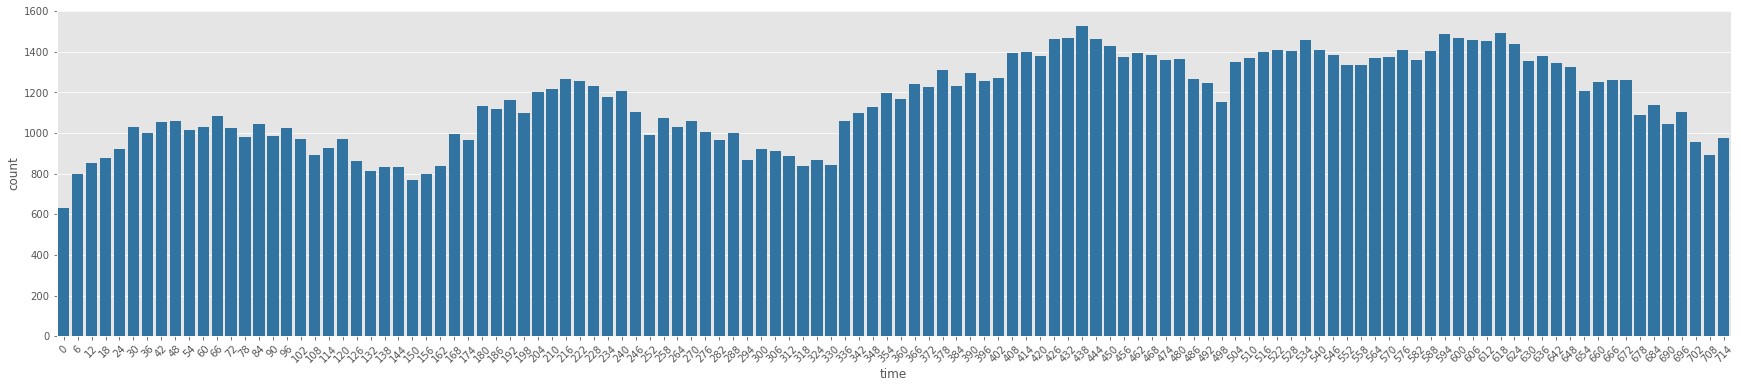

In [620]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation = 45)
sns.countplot(data=df_event_transaction, x = 'time', color = 'tab:blue')
plt.show()

In [625]:
df_event_offer_completed = transcript[transcript['event'] == 'offer completed']
df_event_offer_completed

,person,event,value,time
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,offer completed,{'offer_id': '2906b810c7d4411798c6938adc9daaa5...,0
12672,fe97aa22dd3e48c8b143116a8403dd52,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,0
12679,629fc02d56414d91bca360decdfa9288,offer completed,{'offer_id': '9b98b8c7a33c4b65b9aebfe6a799e6d9...,0
12692,676506bad68e4161b9bbaffeb039626b,offer completed,{'offer_id': 'ae264e3637204a6fb9bb56bc8210ddfd...,0
12697,8f7dd3b2afe14c078eb4f6e6fe4ba97d,offer completed,{'offer_id': '4d5c57ea9a6940dd891ad53e9dbe8da0...,0
...,...,...,...,...
306475,0c027f5f34dd4b9eba0a25785c611273,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714


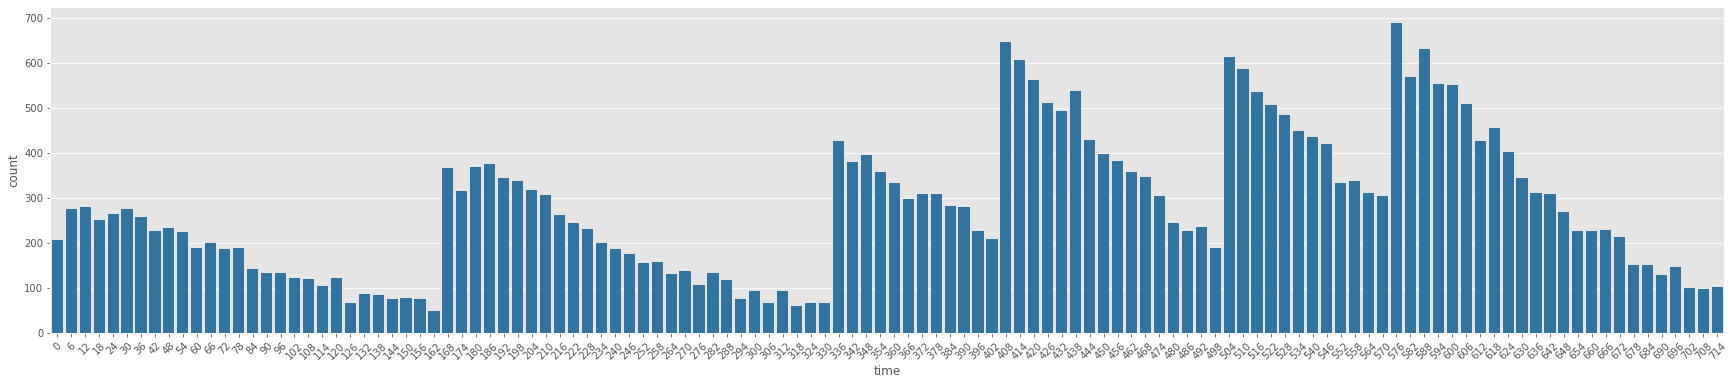

In [626]:
plt.figure(figsize=(30, 6))
plt.xticks(rotation = 45)
sns.countplot(data=df_event_offer_completed, x = 'time', color = 'tab:blue')
plt.show()

#### value에 대한 분석 

In [627]:
# str로 되어있는 데이터를 dictionary로 변환
transcript.value = transcript.value.apply(lambda x:eval(x))
transcript

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0
...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714


In [628]:
list(transcript.value[0].keys())[0]

'offer id'

In [629]:
# event에 따른 value의 차이 확인
transcript["value_key"] = transcript.value.apply(lambda x:list(x.keys())[0])
transcript["value_value"] = transcript.value.apply(lambda x:list(x.values())[0])
transcript

,person,event,value,time,value_key,value_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306529,b3a1272bc9904337b331bf348c3e8c17,transaction,{'amount': 1.5899999999999999},714,amount,1.59
306530,68213b08d99a4ae1b0dcb72aebd9aa35,transaction,{'amount': 9.53},714,amount,9.53
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714,amount,3.61
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714,amount,3.53


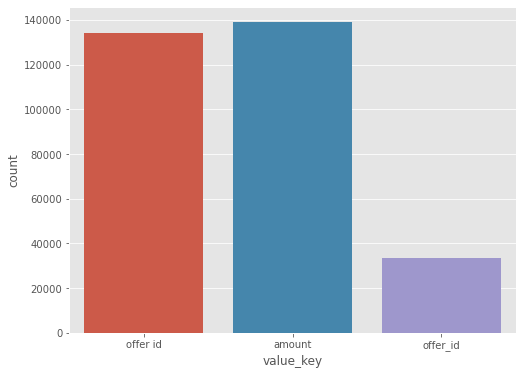

In [630]:
plt.figure(figsize=(8, 6))
sns.countplot(data=transcript, x="value_key")
plt.show()

이벤트 종류에 따라 value가 차이나는 것을 파악할 수 있었다.
- offer id: offer received/offer viewed
- amount: transaction
- offer_id: offer completed

In [631]:
# portfolio와 transcript를 합치기
# transaction 제외 각 offer가 몇개 생성됐는지 확인
temp = transcript.loc[transcript.value_key != "amount", "value_value"]
temp_df = pd.DataFrame({"id" : temp.values})
temp_df

,id
0,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,2906b810c7d4411798c6938adc9daaa5
3,fafdcd668e3743c1bb461111dcafc2a4
4,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2
167577,fafdcd668e3743c1bb461111dcafc2a4
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7
167579,fafdcd668e3743c1bb461111dcafc2a4


In [632]:
temp_portfolio = pd.merge(temp_df, portfolio, how="left", on="id")
temp_portfolio

,id,reward,channels,difficulty,duration,offer_type
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo
...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount


In [633]:
#알아보기 힘든 offer id 를 보기 쉽게 바꾸기
offer_id_dict = {
    'fafdcd668e3743c1bb461111dcafc2a4' : 'no. 01', 
    '2298d6c36e964ae4a3e7e9706d1fb8c2' : 'no. 02', 
    'f19421c1d4aa40978ebb69ca19b0e20d' : 'no. 03', 
    '4d5c57ea9a6940dd891ad53e9dbe8da0' : 'no. 04',
    'ae264e3637204a6fb9bb56bc8210ddfd' : 'no. 05',
    '9b98b8c7a33c4b65b9aebfe6a799e6d9' : 'no. 06',
    '2906b810c7d4411798c6938adc9daaa5' : 'no. 07',
    '5a8bc65990b245e5a138643cd4eb9837' : 'no. 08',
    '0b1e1539f2cc45b7b9fa7c272da2e1d7' : 'no. 09',
    '3f207df678b143eea3cee63160fa8bed' : 'no. 10'}

In [634]:
temp_portfolio['offer_id_no.'] = temp_portfolio['id'].map(offer_id_dict)
temp_portfolio

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo,no. 06
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount,no. 09
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount,no. 07
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,no. 04
...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount,no. 02
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount,no. 09
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01


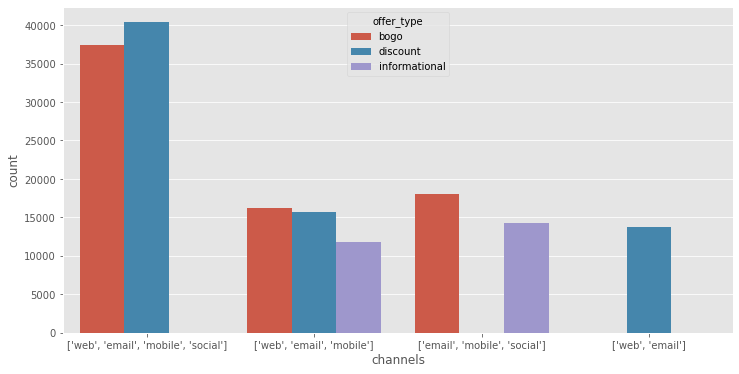

In [640]:
# 채널별 offer type 수
plt.figure(figsize=(12, 6))
sns.countplot(data=temp_portfolio, x = 'channels', hue="offer_type", order = temp_portfolio['channels'].value_counts().index)
plt.show()

In [641]:
temp_portfolio['offer_type'].value_counts()

bogo             71617
discount         69898
informational    26066
Name: offer_type, dtype: int64

In [642]:
temp_portfolio.groupby('channels')['offer_type'].value_counts()

channels                              offer_type   
['email', 'mobile', 'social']         bogo             18062
                                      informational    14305
['web', 'email', 'mobile', 'social']  discount         40380
                                      bogo             37353
['web', 'email', 'mobile']            bogo             16202
                                      discount         15767
                                      informational    11761
['web', 'email']                      discount         13751
Name: offer_type, dtype: int64

In [643]:
#각 항목별로 몇%인지 단순 계산
14305 / (18062+14305)

0.4419624926622795

In [637]:
temp_portfolio_no_info = temp_portfolio[temp_portfolio['offer_type'] != 'informational']

In [644]:
# transcript에서 transaction 제외한 이벤트 관련 분석
transcript_no_transaction = transcript[transcript['event'] != 'transaction']
transcript_no_transaction

,person,event,value,time,value_key,value_value
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0
...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,offer_id,2298d6c36e964ae4a3e7e9706d1fb8c2
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4


In [645]:
transcript_no_transaction['offer_id_no.'] = transcript['value_value'].map(offer_id_dict)
transcript_no_transaction

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_48826/3018682786.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  transcript_no_transaction['offer_id_no.'] = transcript['value_value'].map(offer_id_dict)


,person,event,value,time,value_key,value_value,offer_id_no.
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0,offer id,9b98b8c7a33c4b65b9aebfe6a799e6d9,no. 06
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,no. 09
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0,offer id,2906b810c7d4411798c6938adc9daaa5,no. 07
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0,offer id,fafdcd668e3743c1bb461111dcafc2a4,no. 01
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0,offer id,4d5c57ea9a6940dd891ad53e9dbe8da0,no. 04
...,...,...,...,...,...,...,...
306497,a6f84f4e976f44508c358cc9aba6d2b3,offer completed,{'offer_id': '2298d6c36e964ae4a3e7e9706d1fb8c2...,714,offer_id,2298d6c36e964ae4a3e7e9706d1fb8c2,no. 02
306506,b895c57e8cd047a8872ce02aa54759d6,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4,no. 01
306507,8dda575c2a1d44b9ac8e8b07b93d1f8e,offer viewed,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},714,offer id,0b1e1539f2cc45b7b9fa7c272da2e1d7,no. 09
306509,8431c16f8e1d440880db371a68f82dd0,offer completed,{'offer_id': 'fafdcd668e3743c1bb461111dcafc2a4...,714,offer_id,fafdcd668e3743c1bb461111dcafc2a4,no. 01


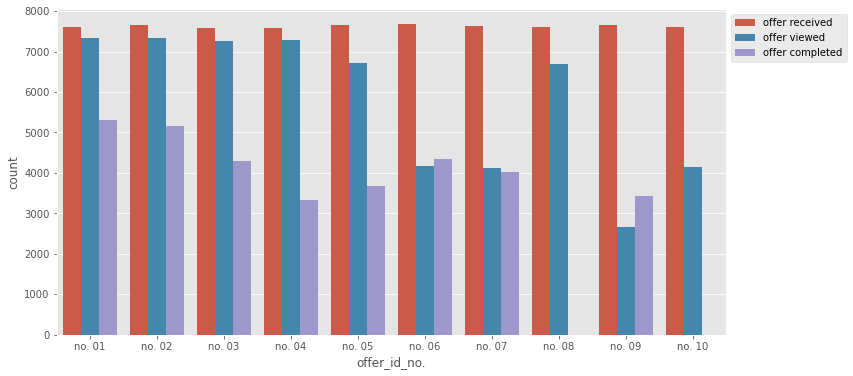

In [646]:
# offer id 별로 진행단계 수
plt.figure(figsize=(12, 6))
sns.countplot(data=transcript_no_transaction, x = 'offer_id_no.', hue="event", order = transcript_no_transaction['offer_id_no.'].value_counts().index)
plt.legend(loc = 2, bbox_to_anchor = (1,1))
plt.show()

In [647]:
transcript_no_transaction.groupby('offer_id_no.')['event'].value_counts()

offer_id_no.  event          
no. 01        offer received     7597
              offer viewed       7327
              offer completed    5317
no. 02        offer received     7646
              offer viewed       7337
              offer completed    5156
no. 03        offer received     7571
              offer viewed       7264
              offer completed    4296
no. 04        offer received     7593
              offer viewed       7298
              offer completed    3331
no. 05        offer received     7658
              offer viewed       6716
              offer completed    3688
no. 06        offer received     7677
              offer completed    4354
              offer viewed       4171
no. 07        offer received     7632
              offer viewed       4118
              offer completed    4017
no. 08        offer received     7618
              offer viewed       6687
no. 09        offer received     7668
              offer completed    3420
              offer 

In [648]:
# 비율 확인
3420/7668

0.4460093896713615

In [651]:
#채널별 event 진행 수 집계를 위해 데이터 병합
transcript_no_transaction_concat = pd.DataFrame(transcript_no_transaction['event'])
transcript_no_transaction_concat

,event
0,offer received
1,offer received
2,offer received
3,offer received
4,offer received
...,...
306497,offer completed
306506,offer completed
306507,offer viewed
306509,offer completed


In [652]:
transcript_no_transaction_concat.reset_index(inplace = True)
transcript_no_transaction_concat = transcript_no_transaction_concat.drop(['index'], axis = 1)
transcript_no_transaction_concat

,event
0,offer received
1,offer received
2,offer received
3,offer received
4,offer received
...,...
167576,offer completed
167577,offer completed
167578,offer viewed
167579,offer completed


In [653]:
df_portfolio_event = pd.concat([temp_portfolio, transcript_no_transaction_concat], axis = 1)
df_portfolio_event

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo,no. 06,offer received
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount,no. 09,offer received
2,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount,no. 07,offer received
3,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer received
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,no. 04,offer received
...,...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount,no. 02,offer completed
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer completed
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"['web', 'email']",20,10,discount,no. 09,offer viewed
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer completed


In [654]:
df_portfolio_event.groupby('channels')['event'].value_counts()

channels                              event          
['email', 'mobile', 'social']         offer received     15276
                                      offer viewed       13403
                                      offer completed     3688
['web', 'email', 'mobile', 'social']  offer received     30407
                                      offer viewed       29226
                                      offer completed    18100
['web', 'email', 'mobile']            offer received     22926
                                      offer viewed       12433
                                      offer completed     8371
['web', 'email']                      offer received      7668
                                      offer completed     3420
                                      offer viewed        2663
Name: event, dtype: int64

In [655]:
2663 / 7668 #2개 received 대비 viewed

0.34728742827334375

In [656]:
3420/7668 #2개 received 대비 completed

0.4460093896713615

In [657]:
18100 / 30407 #4개

0.5952576709310357

In [658]:
8371 / 22926 #3개 웹

0.3651312919829015

In [659]:
3688 / 15276 #3개 소셜

0.2414244566640482

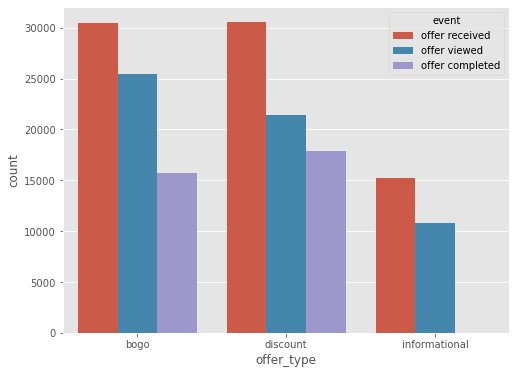

In [725]:
#전체 offer type별 캠페인 진행수

plt.figure(figsize=(8, 6))
sns.countplot(data=df_portfolio_event, x = 'offer_type', hue="event", order = df_portfolio_event['offer_type'].value_counts().index)
plt.show()

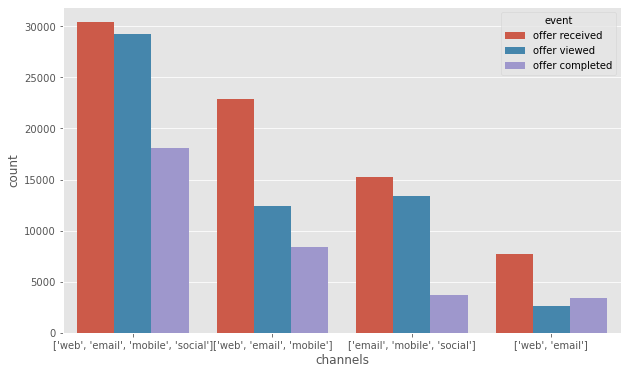

In [660]:
#전체 채널별 캠페인 진행 수

plt.figure(figsize=(10, 6))
sns.countplot(data=df_portfolio_event, x="channels", hue="event", order = df_portfolio_event['channels'].value_counts().index)
plt.show()

In [726]:
df_portfolio_event.groupby('offer_type')['event'].value_counts()

offer_type     event          
bogo           offer received     30499
               offer viewed       25449
               offer completed    15669
discount       offer received     30543
               offer viewed       21445
               offer completed    17910
informational  offer received     15235
               offer viewed       10831
Name: event, dtype: int64

In [727]:
10831/15235

0.7109287824089268

In [661]:
#offer completed 만 분석
df_portfolio_event_completed = df_portfolio_event[df_portfolio_event['event'] == 'offer completed']
df_portfolio_event_completed

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
12656,2906b810c7d4411798c6938adc9daaa5,2,"['web', 'email', 'mobile']",10,7,discount,no. 07,offer completed
12667,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer completed
12673,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"['web', 'email', 'mobile']",5,7,bogo,no. 06,offer completed
12683,ae264e3637204a6fb9bb56bc8210ddfd,10,"['email', 'mobile', 'social']",10,7,bogo,no. 05,offer completed
12687,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"['web', 'email', 'mobile', 'social']",10,5,bogo,no. 04,offer completed
...,...,...,...,...,...,...,...,...
167573,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount,no. 02,offer completed
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"['web', 'email', 'mobile', 'social']",7,7,discount,no. 02,offer completed
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer completed
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"['web', 'email', 'mobile', 'social']",10,10,discount,no. 01,offer completed


In [662]:
df_portfolio_event_completed['channels'] = df_portfolio_event_completed['channels'].str.slice(start=2, stop = -2)
df_portfolio_event_completed

/var/folders/j2/qvzy45bn0l71dytmdq4v9r6r0000gn/T/ipykernel_48826/1563528472.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_portfolio_event_completed['channels'] = df_portfolio_event_completed['channels'].str.slice(start=2, stop = -2)


,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
12656,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer completed
12667,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed
12673,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"web', 'email', 'mobile",5,7,bogo,no. 06,offer completed
12683,ae264e3637204a6fb9bb56bc8210ddfd,10,"email', 'mobile', 'social",10,7,bogo,no. 05,offer completed
12687,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"web', 'email', 'mobile', 'social",10,5,bogo,no. 04,offer completed
...,...,...,...,...,...,...,...,...
167573,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer completed
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer completed
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed


In [663]:
# 4가지 채널 각각 offer received와 completed 분석 - offer completed
channel_split = pd.DataFrame(df_portfolio_event_completed['channels'].str.split("', '"))
channel_split

,channels
12656,"[web, email, mobile]"
12667,"[web, email, mobile, social]"
12673,"[web, email, mobile]"
12683,"[email, mobile, social]"
12687,"[web, email, mobile, social]"
...,...
167573,"[web, email, mobile, social]"
167576,"[web, email, mobile, social]"
167577,"[web, email, mobile, social]"
167579,"[web, email, mobile, social]"


In [664]:
channel_split.reset_index(inplace = True)

In [665]:
channel_split.drop('index', axis = 1)

,channels
0,"[web, email, mobile]"
1,"[web, email, mobile, social]"
2,"[web, email, mobile]"
3,"[email, mobile, social]"
4,"[web, email, mobile, social]"
...,...
33574,"[web, email, mobile, social]"
33575,"[web, email, mobile, social]"
33576,"[web, email, mobile, social]"
33577,"[web, email, mobile, social]"


In [666]:
event_completed_channel_split = pd.DataFrame(index=range(0, 33579), columns = ['five'])
event_completed_channel_split

,five
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
33574,NaN
33575,NaN
33576,NaN
33577,NaN


In [667]:
event_completed_channel_split['one'] = channel_split['channels'].str.get(0)
event_completed_channel_split['two'] = channel_split['channels'].str.get(1)
event_completed_channel_split['three'] = channel_split['channels'].str.get(2)
event_completed_channel_split['four'] = channel_split['channels'].str.get(3)
event_completed_channel_split

,five,one,two,three,four
0,NaN,web,email,mobile,NaN
1,NaN,web,email,mobile,social
2,NaN,web,email,mobile,NaN
3,NaN,email,mobile,social,NaN
4,NaN,web,email,mobile,social
...,...,...,...,...,...
33574,NaN,web,email,mobile,social
33575,NaN,web,email,mobile,social
33576,NaN,web,email,mobile,social
33577,NaN,web,email,mobile,social


In [668]:
channel_split['channels'].str.get(0)

0          web
1          web
2          web
3        email
4          web
         ...  
33574      web
33575      web
33576      web
33577      web
33578      web
Name: channels, Length: 33579, dtype: object

In [669]:
event_completed_channel_split = event_completed_channel_split.drop('five', axis = 1)
event_completed_channel_split

,one,two,three,four
0,web,email,mobile,NaN
1,web,email,mobile,social
2,web,email,mobile,NaN
3,email,mobile,social,NaN
4,web,email,mobile,social
...,...,...,...,...
33574,web,email,mobile,social
33575,web,email,mobile,social
33576,web,email,mobile,social
33577,web,email,mobile,social


In [670]:
event_completed_channel_split['one'].value_counts()

web      29891
email     3688
Name: one, dtype: int64

In [671]:
event_completed_channel_split['two'].value_counts()

email     29891
mobile     3688
Name: two, dtype: int64

In [672]:
event_completed_channel_split['three'].value_counts()

mobile    26471
social     3688
Name: three, dtype: int64

In [673]:
event_completed_channel_split['four'].value_counts()

social    18100
Name: four, dtype: int64

In [674]:
#web 
29891

29891

In [675]:
#email 
3688+29891

33579

In [676]:
#mobile 
3688+26471

30159

In [677]:
#social 
3688+18100

21788

In [678]:
df_portfolio_event['channels'] = df_portfolio_event['channels'].str.slice(start=2, stop = -2)
df_portfolio_event

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"web', 'email', 'mobile",5,7,bogo,no. 06,offer received
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer received
2,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
3,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer received
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"web', 'email', 'mobile', 'social",10,5,bogo,no. 04,offer received
...,...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer completed
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer viewed
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed


In [679]:
#offer received
df_portfolio_event_received = df_portfolio_event[df_portfolio_event['event'] == 'offer received']
df_portfolio_event_received

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"web', 'email', 'mobile",5,7,bogo,no. 06,offer received
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer received
2,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
3,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer received
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"web', 'email', 'mobile', 'social",10,5,bogo,no. 04,offer received
...,...,...,...,...,...,...,...,...
149461,ae264e3637204a6fb9bb56bc8210ddfd,10,"email', 'mobile', 'social",10,7,bogo,no. 05,offer received
149462,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
149463,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer received
149464,ae264e3637204a6fb9bb56bc8210ddfd,10,"email', 'mobile', 'social",10,7,bogo,no. 05,offer received


In [680]:
df_portfolio_event_received['offer_type'].value_counts()

discount         30543
bogo             30499
informational    15235
Name: offer_type, dtype: int64

In [681]:
event_received_channel_split = pd.DataFrame(df_portfolio_event_received['channels'].str.split("', '"))
event_received_channel_split

,channels
0,"[web, email, mobile]"
1,"[web, email]"
2,"[web, email, mobile]"
3,"[web, email, mobile, social]"
4,"[web, email, mobile, social]"
...,...
149461,"[email, mobile, social]"
149462,"[web, email, mobile]"
149463,"[web, email, mobile, social]"
149464,"[email, mobile, social]"


In [682]:
event_received_channel_split['one'] = event_received_channel_split['channels'].str.get(0)
event_received_channel_split['two'] = event_received_channel_split['channels'].str.get(1)
event_received_channel_split['three'] = event_received_channel_split['channels'].str.get(2)
event_received_channel_split['four'] = event_received_channel_split['channels'].str.get(3)
event_received_channel_split

,channels,one,two,three,four
0,"[web, email, mobile]",web,email,mobile,NaN
1,"[web, email]",web,email,NaN,NaN
2,"[web, email, mobile]",web,email,mobile,NaN
3,"[web, email, mobile, social]",web,email,mobile,social
4,"[web, email, mobile, social]",web,email,mobile,social
...,...,...,...,...,...
149461,"[email, mobile, social]",email,mobile,social,NaN
149462,"[web, email, mobile]",web,email,mobile,NaN
149463,"[web, email, mobile, social]",web,email,mobile,social
149464,"[email, mobile, social]",email,mobile,social,NaN


In [683]:
event_received_channel_split['one'].value_counts()

web      61001
email    15276
Name: one, dtype: int64

In [684]:
event_received_channel_split['two'].value_counts()

email     61001
mobile    15276
Name: two, dtype: int64

In [685]:
event_received_channel_split['three'].value_counts()

mobile    53333
social    15276
Name: three, dtype: int64

In [686]:
event_received_channel_split['four'].value_counts()

social    30407
Name: four, dtype: int64

In [687]:
#웹
61001

61001

In [688]:
#이메일
15276+61001

76277

In [689]:
#모바일
15276+53333

68609

In [690]:
#소셜
15276+30407

45683

In [691]:
all_channel_ratio = pd.DataFrame({'offer received': [61001, 76277, 68609, 45683],
                              'offer completed': [29891, 33579, 30159, 21788]},
                              index = ['web', 'email', 'mobile', 'social'])
all_channel_ratio

,offer received,offer completed
web,61001,29891
email,76277,33579
mobile,68609,30159
social,45683,21788


<AxesSubplot:>

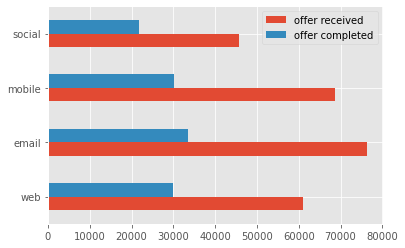

In [692]:
all_channel_ratio.plot.barh()

In [693]:
all_channel_ratio_percent = all_channel_ratio['offer completed'] / all_channel_ratio['offer received'] *100
all_channel_ratio_percent

web       49.000836
email     44.022445
mobile    43.957790
social    47.693891
dtype: float64

In [694]:
#offer type이 info인 것들은 offer completed가 없어 info 제외하고 집계해보기
df_portfolio_event_no_info = df_portfolio_event[df_portfolio_event['offer_type'] != 'informational']
df_portfolio_event_no_info

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"web', 'email', 'mobile",5,7,bogo,no. 06,offer received
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer received
2,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
3,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer received
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"web', 'email', 'mobile', 'social",10,5,bogo,no. 04,offer received
...,...,...,...,...,...,...,...,...
167576,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer completed
167577,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed
167578,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer viewed
167579,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer completed


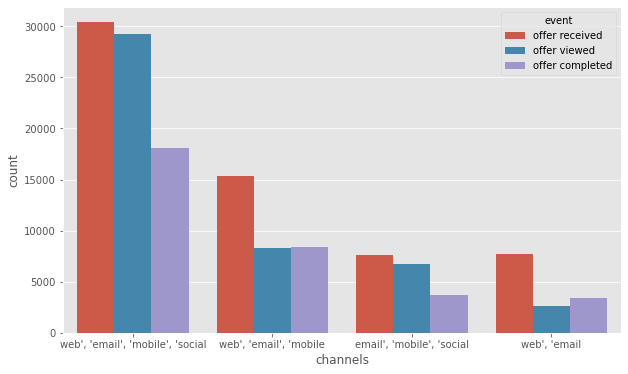

In [695]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df_portfolio_event_no_info, x="channels", hue="event", order = df_portfolio_event['channels'].value_counts().index)
plt.show()

In [696]:
df_portfolio_event_no_info.groupby('channels')['event'].value_counts()

channels                          event          
email', 'mobile', 'social         offer received      7658
                                  offer viewed        6716
                                  offer completed     3688
web', 'email                      offer received      7668
                                  offer completed     3420
                                  offer viewed        2663
web', 'email', 'mobile            offer received     15309
                                  offer completed     8371
                                  offer viewed        8289
web', 'email', 'mobile', 'social  offer received     30407
                                  offer viewed       29226
                                  offer completed    18100
Name: event, dtype: int64

In [697]:
df_portfolio_event_no_info['offer_type'].value_counts()

bogo        71617
discount    69898
Name: offer_type, dtype: int64

In [740]:
#offer received
df_portfolio_no_info_event_received = df_portfolio_event_no_info[df_portfolio_event_no_info['event'] == 'offer received']
df_portfolio_no_info_event_received

,id,reward,channels,difficulty,duration,offer_type,offer_id_no.,event
0,9b98b8c7a33c4b65b9aebfe6a799e6d9,5,"web', 'email', 'mobile",5,7,bogo,no. 06,offer received
1,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer received
2,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
3,fafdcd668e3743c1bb461111dcafc2a4,2,"web', 'email', 'mobile', 'social",10,10,discount,no. 01,offer received
4,4d5c57ea9a6940dd891ad53e9dbe8da0,10,"web', 'email', 'mobile', 'social",10,5,bogo,no. 04,offer received
...,...,...,...,...,...,...,...,...
149458,0b1e1539f2cc45b7b9fa7c272da2e1d7,5,"web', 'email",20,10,discount,no. 09,offer received
149461,ae264e3637204a6fb9bb56bc8210ddfd,10,"email', 'mobile', 'social",10,7,bogo,no. 05,offer received
149462,2906b810c7d4411798c6938adc9daaa5,2,"web', 'email', 'mobile",10,7,discount,no. 07,offer received
149463,2298d6c36e964ae4a3e7e9706d1fb8c2,3,"web', 'email', 'mobile', 'social",7,7,discount,no. 02,offer received


In [741]:
df_portfolio_event_no_info_channel_split = pd.DataFrame(df_portfolio_no_info_event_received['channels'].str.split("', '"))
df_portfolio_event_no_info_channel_split

,channels
0,"[web, email, mobile]"
1,"[web, email]"
2,"[web, email, mobile]"
3,"[web, email, mobile, social]"
4,"[web, email, mobile, social]"
...,...
149458,"[web, email]"
149461,"[email, mobile, social]"
149462,"[web, email, mobile]"
149463,"[web, email, mobile, social]"


In [742]:
df_portfolio_event_no_info_channel_split['one'] = df_portfolio_event_no_info_channel_split['channels'].str.get(0)
df_portfolio_event_no_info_channel_split['two'] = df_portfolio_event_no_info_channel_split['channels'].str.get(1)
df_portfolio_event_no_info_channel_split['three'] = df_portfolio_event_no_info_channel_split['channels'].str.get(2)
df_portfolio_event_no_info_channel_split['four'] = df_portfolio_event_no_info_channel_split['channels'].str.get(3)
df_portfolio_event_no_info_channel_split

,channels,one,two,three,four
0,"[web, email, mobile]",web,email,mobile,NaN
1,"[web, email]",web,email,NaN,NaN
2,"[web, email, mobile]",web,email,mobile,NaN
3,"[web, email, mobile, social]",web,email,mobile,social
4,"[web, email, mobile, social]",web,email,mobile,social
...,...,...,...,...,...
149458,"[web, email]",web,email,NaN,NaN
149461,"[email, mobile, social]",email,mobile,social,NaN
149462,"[web, email, mobile]",web,email,mobile,NaN
149463,"[web, email, mobile, social]",web,email,mobile,social


In [743]:
df_portfolio_event_no_info_channel_split.reset_index(inplace=True)

In [744]:
df_portfolio_event_no_info_channel_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61042 entries, 0 to 61041
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   index     61042 non-null  int64 
 1   channels  61042 non-null  object
 2   one       61042 non-null  object
 3   two       61042 non-null  object
 4   three     53374 non-null  object
 5   four      30407 non-null  object
dtypes: int64(1), object(5)
memory usage: 2.8+ MB


In [745]:
df_portfolio_event_no_info_channel_split['one'].value_counts()

web      53384
email     7658
Name: one, dtype: int64

In [746]:
df_portfolio_event_no_info_channel_split['two'].value_counts()

email     53384
mobile     7658
Name: two, dtype: int64

In [747]:
df_portfolio_event_no_info_channel_split['three'].value_counts()

mobile    45716
social     7658
Name: three, dtype: int64

In [748]:
df_portfolio_event_no_info_channel_split['four'].value_counts()

social    30407
Name: four, dtype: int64

In [749]:
#web
53384

53384

In [751]:
#email
7658 + 53384

61042

In [752]:
#mobile
7658 + 45716

53374

In [753]:
#social
7658 + 30407

38065

In [755]:
channel_ratio = pd.DataFrame({'offer received': [53384, 61042, 53374, 38065],
                              'offer completed': [29891, 33579, 30159, 21788]},
                              index = ['web', 'email', 'mobile', 'social'])

In [756]:
channel_ratio

,offer received,offer completed
web,53384,29891
email,61042,33579
mobile,53374,30159
social,38065,21788


<AxesSubplot:>

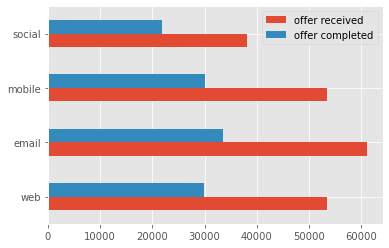

In [757]:
channel_ratio.plot.barh()

In [758]:
channel_ratio_percent = channel_ratio['offer completed'] / channel_ratio['offer received'] *100
channel_ratio_percent

web       55.992432
email     55.009665
mobile    56.505040
social    57.238933
dtype: float64

In [715]:
offer_type_count = pd.DataFrame(df_portfolio_event.groupby('offer_type')['event'].value_counts())
offer_type_count

event
offer_type    event                 
bogo          offer received   30499
              offer viewed     25449
              offer completed  15669
discount      offer received   30543
              offer viewed     21445
              offer completed  17910
informational offer received   15235
              offer viewed     10831

In [716]:
offer_type_count.rename(columns = {'event' : 'counts'}, inplace = True)

In [717]:
offer_type_count

counts
offer_type    event                  
bogo          offer received    30499
              offer viewed      25449
              offer completed   15669
discount      offer received    30543
              offer viewed      21445
              offer completed   17910
informational offer received    15235
              offer viewed      10831

In [718]:
offer_type_count.reset_index(level = 1, inplace = True)

In [719]:
offer_type_count.reset_index(level = 0, inplace = True)

In [720]:
offer_type_count

,offer_type,event,counts
0,bogo,offer received,30499
1,bogo,offer viewed,25449
2,bogo,offer completed,15669
3,discount,offer received,30543
4,discount,offer viewed,21445
5,discount,offer completed,17910
6,informational,offer received,15235
7,informational,offer viewed,10831


In [721]:
pivot_offer_type_count = offer_type_count.pivot(index = 'offer_type', columns = 'event', values = 'counts')
pivot_offer_type_count

event,offer completed,offer received,offer viewed
offer_type,,,
bogo,15669.0,30499.0,25449.0
discount,17910.0,30543.0,21445.0
informational,NaN,15235.0,10831.0


In [722]:
pivot_offer_type_count = pivot_offer_type_count[['offer received', 'offer viewed', 'offer completed']]

In [723]:
pivot_offer_type_count

event,offer received,offer viewed,offer completed
offer_type,,,
bogo,30499.0,25449.0,15669.0
discount,30543.0,21445.0,17910.0
informational,15235.0,10831.0,NaN


In [728]:
transcript_transaction = transcript[transcript['event'] == 'transaction']
transcript_transaction_counts = pd.DataFrame(transcript_transaction.groupby('person')['value_value'].value_counts())

In [729]:
transcript_transaction_counts.describe()

,value_value
count,138156.000000
mean,1.005769
std,0.076684
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,3.000000
